In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 0) Robot Parameters
L1, L2, L3 = 30.0, 15.0, 10.0

In [4]:
# 1) Forward Kinematics (3-DOF)
#    - 입력: theta = [t1, t2, t3] (rad)
#    - 출력: p0, p1, p2, p3 (각 조인트 위치)
def fk_3dof(theta):
    t1, t2, t3 = theta

    t12  = t1 + t2
    t123 = t12 + t3

    x1 = L1 * np.cos(t1)
    y1 = L1 * np.sin(t1)

    x2 = x1 + L2 * np.cos(t12)
    y2 = y1 + L2 * np.sin(t12)

    x3 = x2 + L3 * np.cos(t123)
    y3 = y2 + L3 * np.sin(t123)

    p0 = np.array([0.0, 0.0])   # base
    p1 = np.array([x1,  y1 ])   # joint 1
    p2 = np.array([x2,  y2 ])   # joint 2
    p3 = np.array([x3,  y3 ])   # tip

    return p0, p1, p2, p3

In [5]:
# 2) Workspace Computation 
#    - 조인트 범위: (deg)로 지정, 내부에서 rad로 변환
def compute_workspace():
    ee_x, ee_y = [], []

    theta1_list = np.radians(np.arange(0,   181, 10))   # 0 ~ 180 deg
    theta2_list = np.radians(np.arange(0,   361, 10))   # 0 ~ 360 deg
    theta3_list = np.radians(np.arange(0,   361, 10))   # 0 ~ 360 deg

    for t1 in theta1_list:
        for t2 in theta2_list:
            for t3 in theta3_list:
                _, _, _, p3 = fk_3dof([t1, t2, t3])
                ee_x.append(p3[0])
                ee_y.append(p3[1])

    return np.array(ee_x), np.array(ee_y)

In [6]:
# 3) Robot Plot 
def plot_robot(theta, ax):

    p0, p1, p2, p3 = fk_3dof(theta)

    # 링크(선)
    ax.plot([p0[0], p1[0]], [p0[1], p1[1]], '-k', linewidth=2)
    ax.plot([p1[0], p2[0]], [p1[1], p2[1]], '-k', linewidth=2)
    ax.plot([p2[0], p3[0]], [p2[1], p3[1]], '-k', linewidth=2)

    # 조인트(점)
    ax.plot(p0[0], p0[1], 'ko', markersize=5)   # base
    ax.plot(p1[0], p1[1], 'bo', markersize=5)   # joint1
    ax.plot(p2[0], p2[1], 'go', markersize=5)   # joint2
    ax.plot(p3[0], p3[1], 'ro', markersize=5)   # tip

In [7]:
# 4) Plot Workspace + Sample Robot Poses
def plot_workspace_and_robot():
    ee_x, ee_y = compute_workspace()

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)

    ax.scatter(ee_x, ee_y, s=1, color='lightgray')

    # # 몇 가지 예시 자세 (t3만 바꿔가며)
    # base_t1 = 60
    # base_t2 = 20
    # for t3_deg in [0, 30, 60, 90, 120, 150, 210, 240, 270, 300, 330]:
    #     theta = np.radians([base_t1, base_t2, t3_deg])
    #     plot_robot(theta, ax)

    # 다중해 경우 
    theta1 = np.radians([30, 46, -30.5-30])    # ([150, 46, -30.5-30])
    plot_robot(theta1, ax)
    # theta2 = np.radians([60, -46, 30.5])
    # plot_robot(theta2, ax)       
    # 특이점 
    # theta1 = np.radians([30, 0, 0])
    # plot_robot(theta1, ax)

    # ax.set_title("3-DOF Robot Workspace + Sample Poses")
    ax.set_title("Elbow up")
    # ax.set_title("3-DOF Robot Workspace")
    # ax.set_title("3-DOF Robot Multiple Solution Case")
    # ax.set_title("3-DOF Robot Singularity Case")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.grid(True)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(-70, 70)
    ax.set_ylim(-70, 70)

    plt.show()
    plt.close(fig)

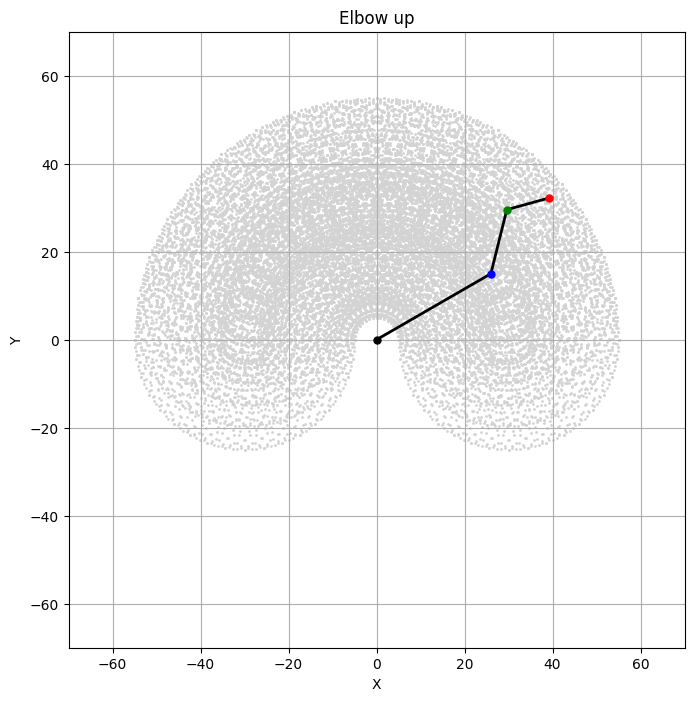

In [8]:
# 5) Run
plot_workspace_and_robot()